# Store Item Demand Forecasting Challenge
## Predict 3 months of item sales at different stores
### https://www.kaggle.com/c/demand-forecasting-kernels-only/data

# 

## Import Module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import sys
from category_encoders import OneHotEncoder

sns.set_style("darkgrid")

# 

## Data Processing

In [2]:
#Carregando os dados
df = pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/PROJETOS/DEMANDA/train.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [3]:
#Convertendo 'date' de formato string para datetime
df.date = pd.to_datetime(df.date)

# 

## First Data Visualization

In [37]:
#Definindo estilo de visualização
sns.set_style("darkgrid")

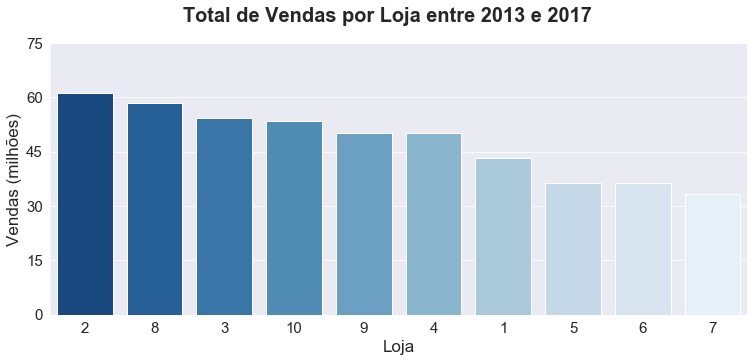

In [138]:
#Criando subset
v1 = df.groupby('store')[['sales']].sum().sort_values(by='sales',ascending=False).reset_index()

#Gerando o gráfico
fig , ax = plt.subplots(figsize=(12.5,5))
fig.suptitle('Total de Vendas por Loja entre 2013 e 2017',fontsize=20,weight='bold')

sns.barplot(x=v1.store, y=v1.sales,palette="Blues_r",order=v1.store)
ax.set_xlabel('Loja',fontsize=17)
ax.set_ylabel('Vendas (milhões)',fontsize=17)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_yticks([0,15*10**5,30*10**5,45*10**5,60*10**5,75*10**5])
ax.set_yticklabels(['0','15','30','45','60','75'])

plt.show()

#### 

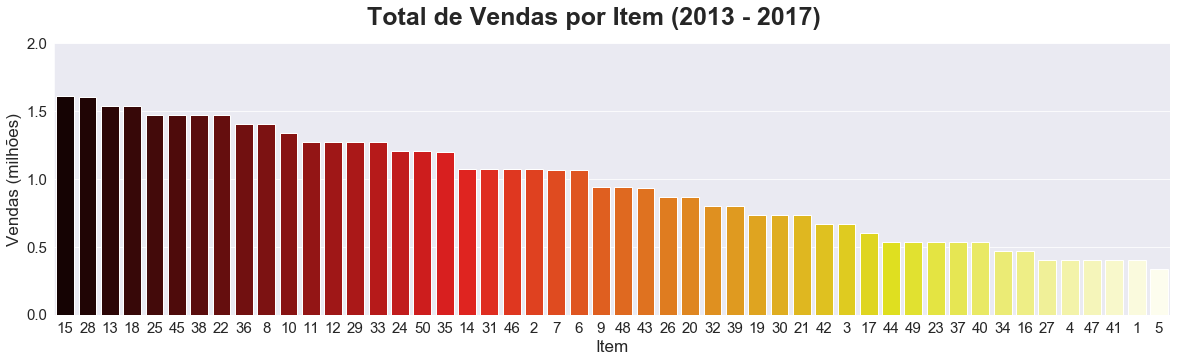

In [135]:
#Produzindo o subset
v2 = df.groupby('item')[['sales']].sum().div(10**6).reset_index().sort_values(by='sales',ascending=False)

#Confeccionando a visualização
fig , ax = plt.subplots(figsize=(20,5))
fig.suptitle('Total de Vendas por Item (2013 - 2017)',fontsize=25,weight='bold')

sns.barplot(x=v2.item, y=v2.sales,palette="hot",order=v2.item)
ax.set_xlabel('Item',fontsize=17)
ax.set_ylabel('Vendas (milhões)',fontsize=17)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_yticks(np.arange(0,2.5,0.5))

plt.show()

#### 

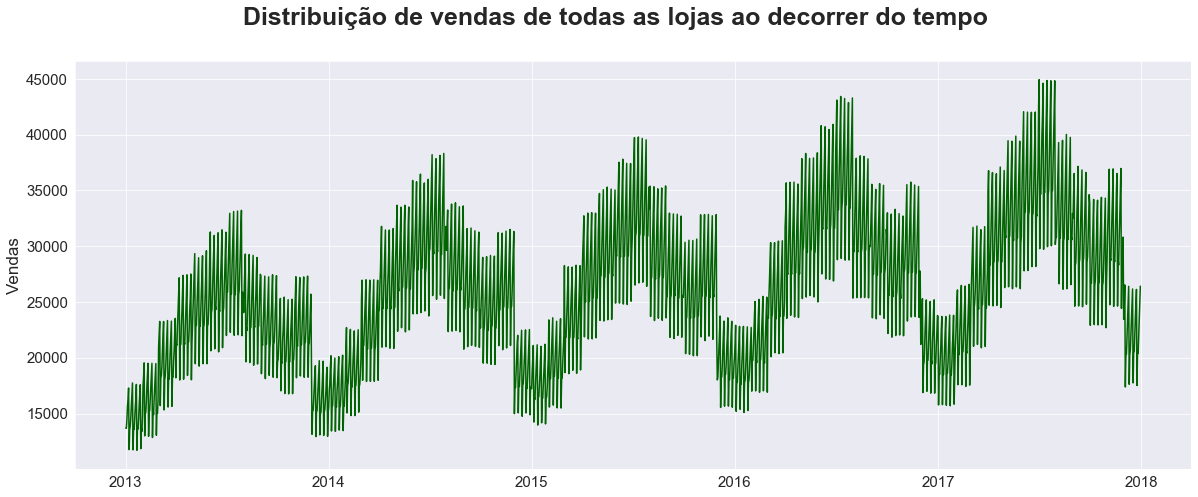

In [134]:
#Gerando o subset
v3 = df.groupby('date')[['sales']].sum().reset_index()

#Plotando o gráfico
fig, ax = plt.subplots(figsize=(20,7.5))
fig.suptitle('Distribuição de vendas de todas as lojas ao decorrer do tempo',fontsize=25,weight='bold')

sns.lineplot(x=v3.date,y=v3.sales,color="darkgreen")
ax.set_xlabel('',fontsize=17)
ax.set_ylabel('Vendas',fontsize=17)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

plt.show()

#### 

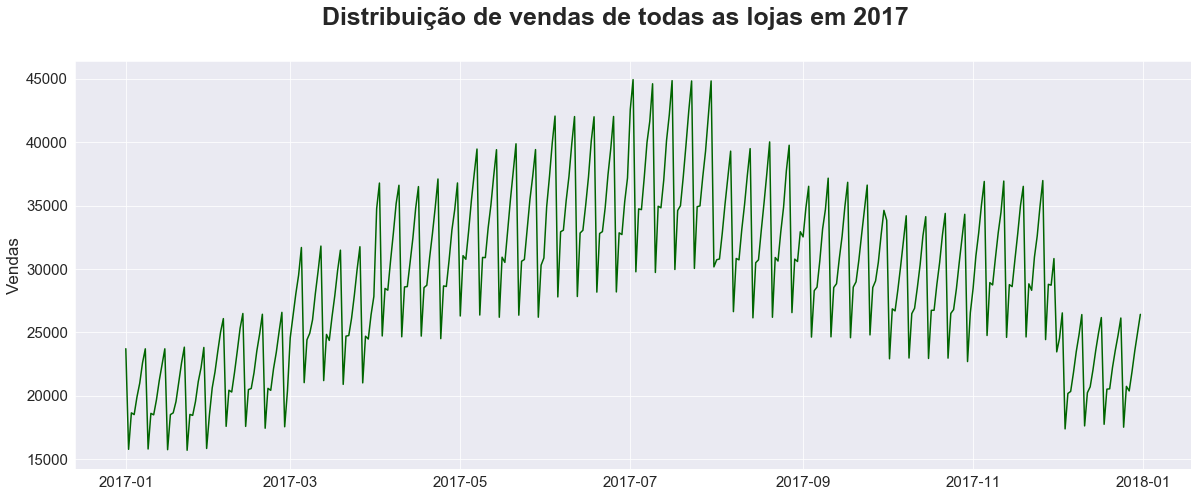

In [140]:
#Criando subset
v4 = df.groupby('date')[['sales']].sum().reset_index()
v4 = v4[v4['date']>='2017-01-01']

#Personalizando a visualização
fig, ax = plt.subplots(figsize=(20,7.5))
fig.suptitle('Distribuição de vendas de todas as lojas em 2017',fontsize=25,weight='bold')

sns.lineplot(x=v4.date,y=v4.sales,color="darkgreen")
ax.set_xlabel('',fontsize=17)
ax.set_ylabel('Vendas',fontsize=17)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

#### 

In [5]:
#Criando colunas correspondentes ao mês do ano e ao dia da semana
df['month'] = df.date.dt.month
df['day_week'] = df.date.dt.dayofweek
df['name_day_week'] = df.day_week.replace([0,1,2,3,4,5,6],['SEG','TER','QUA','QUI','SEX','SAB','DOM'])
df['name_month'] = df.month.replace(np.arange(1,12+1),['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ'])
df

,date,store,item,sales,month,day_week,name_day_week,name_month
0,2013-01-01,1,1,13,1,1,TER,JAN
1,2013-01-02,1,1,11,1,2,QUA,JAN
2,2013-01-03,1,1,14,1,3,QUI,JAN
3,2013-01-04,1,1,13,1,4,SEX,JAN
4,2013-01-05,1,1,10,1,5,SAB,JAN
...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,12,2,QUA,DEZ
912996,2017-12-28,10,50,59,12,3,QUI,DEZ
912997,2017-12-29,10,50,74,12,4,SEX,DEZ
912998,2017-12-30,10,50,62,12,5,SAB,DEZ


In [67]:
v5 = df.groupby('name_day_week')[['sales']].sum().reset_index().sort_values(by='sales',ascending=True)
v6 = df.groupby('name_month')[['sales']].sum().reset_index().sort_values(by='sales',ascending=False)

# Criar um gráfico desse com as divisões pelos anos também

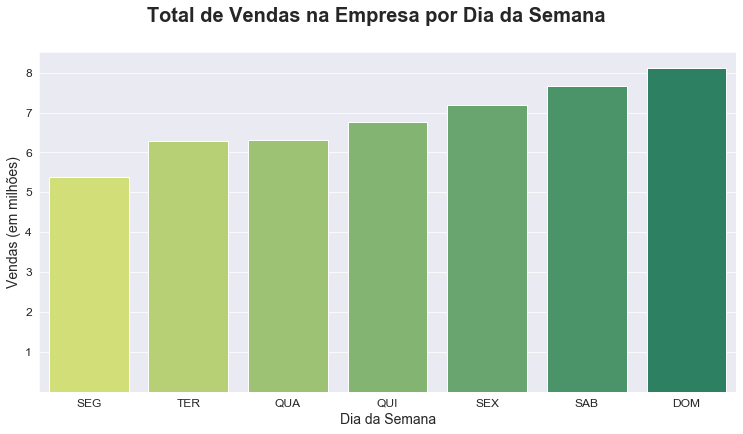

In [59]:
fig , ax = plt.subplots(figsize=(12.5,6.25))
fig.suptitle('Total de Vendas na Empresa por Dia da Semana',fontsize=20,weight='bold')

sns.barplot(x=v5.name_day_week,y=v5.sales,palette="summer_r")
ax.set_xlabel('Dia da Semana',fontsize=14)
ax.set_ylabel('Vendas (em milhões)',fontsize=14)
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
ax.set_yticklabels(['','1','2','3','4','5','6','7','8'])

plt.show()

#Adicionar anotações

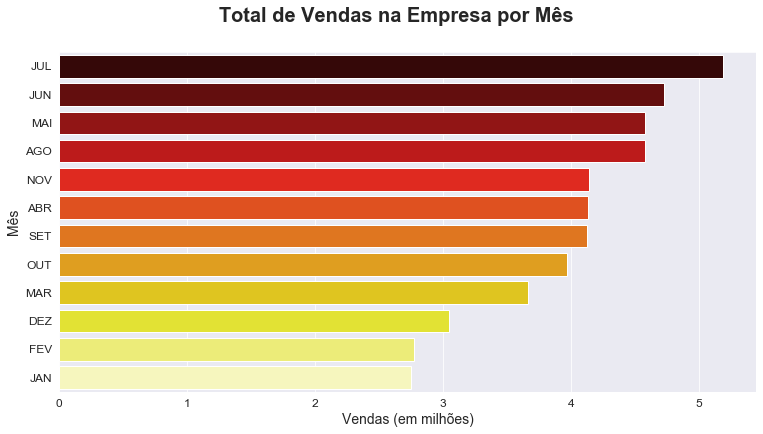

In [66]:
fig , ax = plt.subplots(figsize=(12.5,6.25))
fig.suptitle('Total de Vendas na Empresa por Mês',fontsize=20,weight='bold')

sns.barplot(y=v6.name_month,x=v6.sales,palette="hot",orient='h')
ax.set_ylabel('Mês',fontsize=14)
ax.set_xlabel('Vendas (em milhões)',fontsize=14)
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
ax.set_xticklabels(['0','1','2','3','4','5'])

plt.show()

#Adicionar anotações

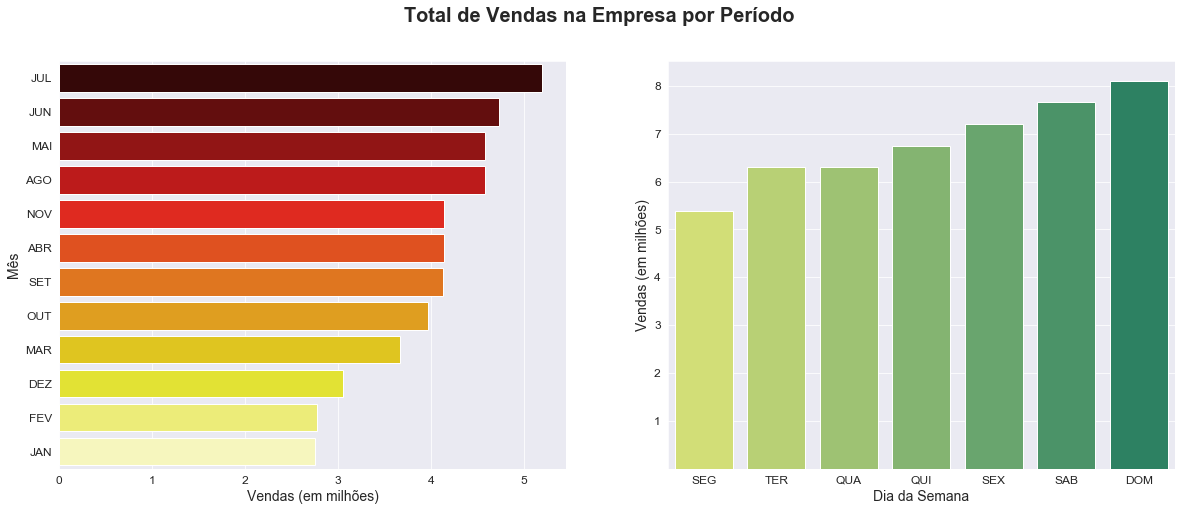

In [65]:
fig , ax = plt.subplots(ncols=2,nrows=1,figsize=(20,7.5))
fig.suptitle('Total de Vendas na Empresa por Período',fontsize=20,weight='bold')

sns.barplot(y=v6.name_month,x=v6.sales,palette="hot",orient='h',ax=ax[0])
ax[0].set_ylabel('Mês',fontsize=14)
ax[0].set_xlabel('Vendas (em milhões)',fontsize=14)
ax[0].tick_params(axis='x',labelsize=12)
ax[0].tick_params(axis='y',labelsize=12)
ax[0].set_xticklabels(['0','1','2','3','4','5'])

sns.barplot(x=v5.name_day_week,y=v5.sales,palette="summer_r",ax=ax[1])
ax[1].set_xlabel('Dia da Semana',fontsize=14)
ax[1].set_ylabel('Vendas (em milhões)',fontsize=14)
ax[1].tick_params(axis='x',labelsize=12)
ax[1].tick_params(axis='y',labelsize=12)
ax[1].set_yticklabels(['','1','2','3','4','5','6','7','8'])

plt.show()

#Adicionar anotações

#### Algumas visualizações das lojas e itens em específico pode interessante

# 

## Second Data Visualization

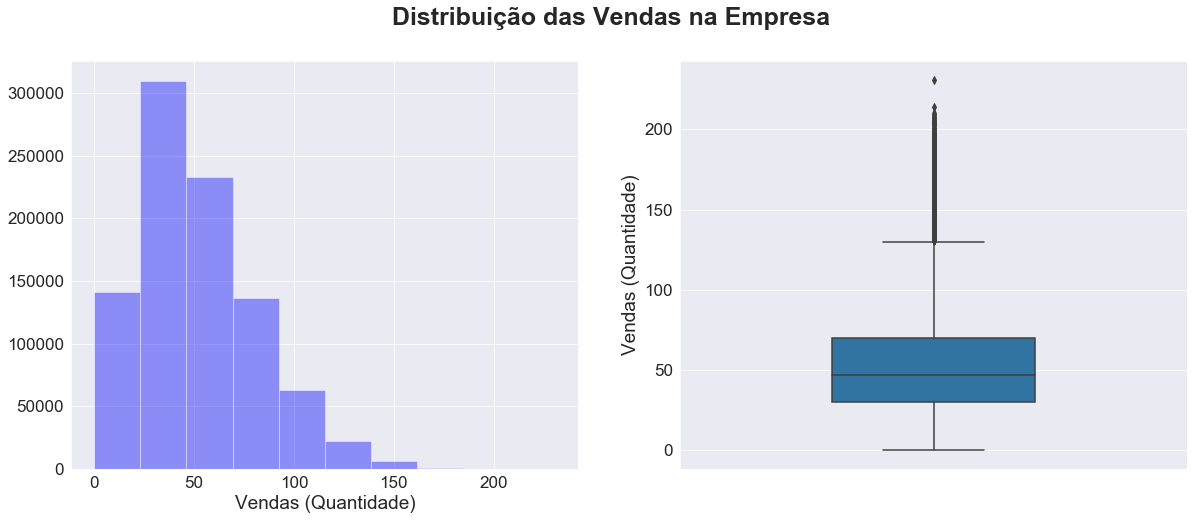

In [45]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(20,7.5))
fig.suptitle('Distribuição das Vendas na Empresa', fontsize=25, weight='bold')

sns.distplot(df.sales, ax=ax[0],color='blue',bins=10,kde=False,)
ax[0].set_xlabel('Vendas (Quantidade)',fontsize=19)
ax[0].set_ylabel('',fontsize=19)
ax[0].tick_params(axis='x',labelsize=17)
ax[0].tick_params(axis='y',labelsize=17)

sns.boxplot(df.sales, ax=ax[1],orient='v',width=0.4)
ax[1].set_ylabel('Vendas (Quantidade)',fontsize=19)
ax[1].tick_params(axis='y',labelsize=17)

plt.show()

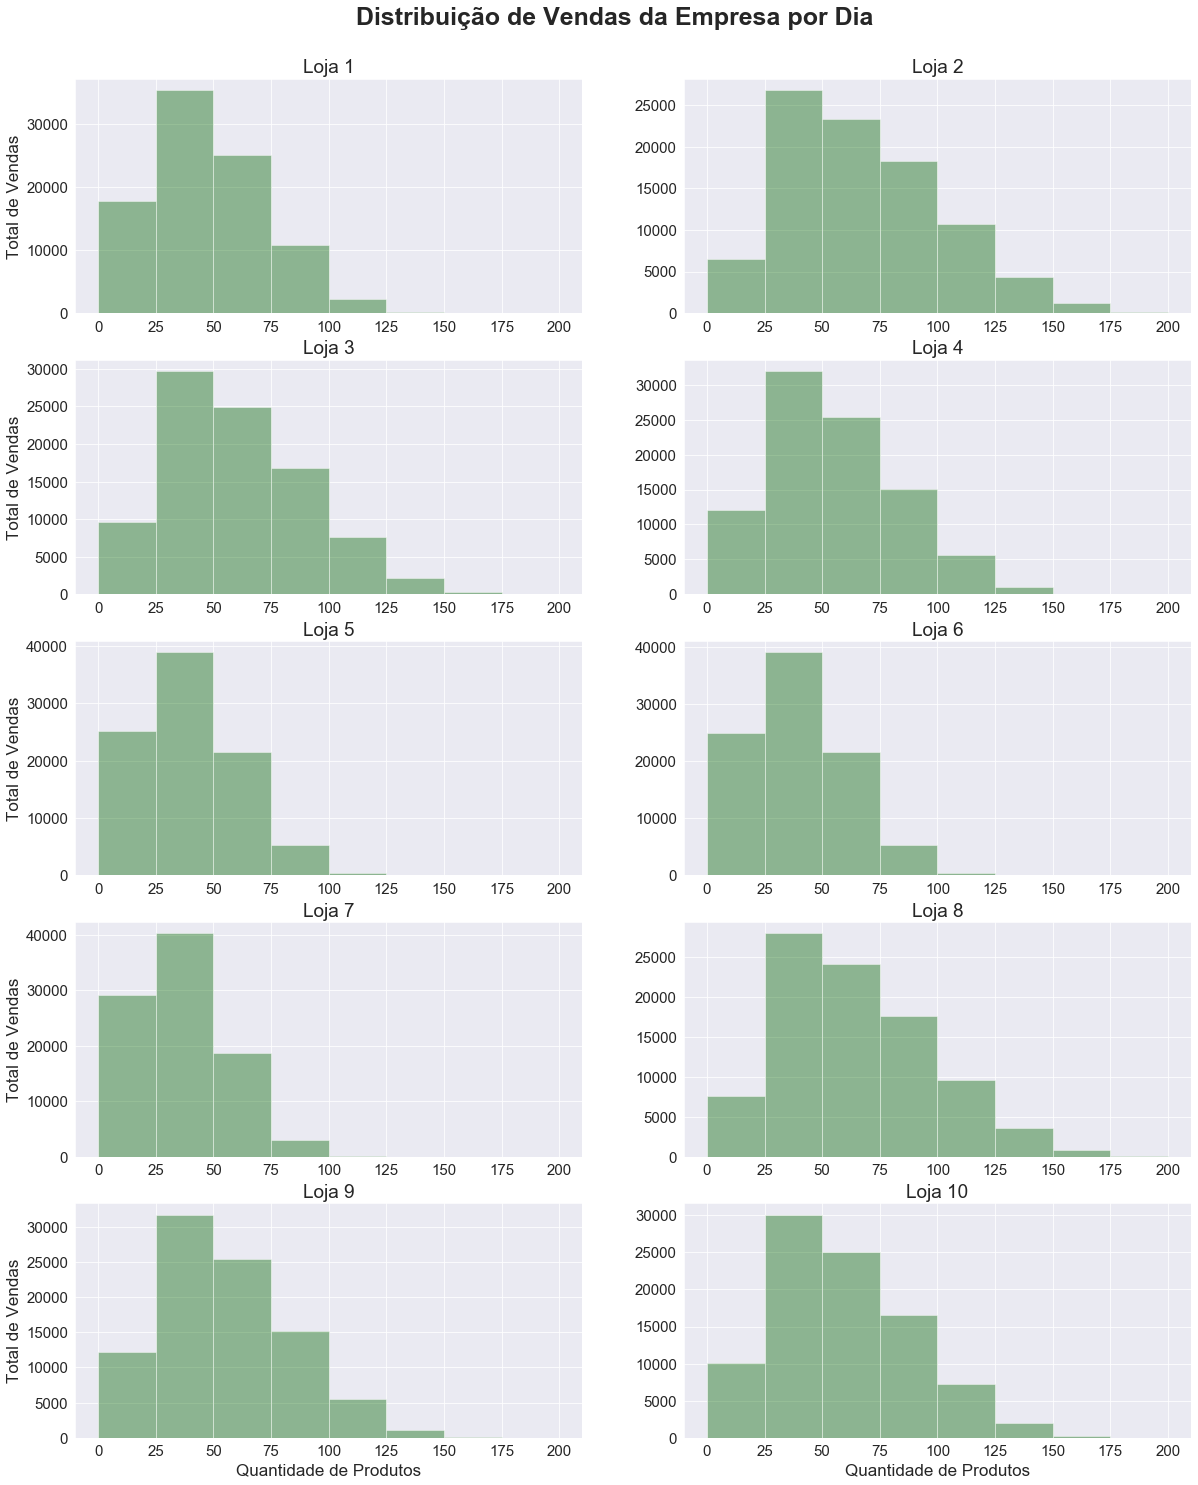

In [47]:
l, c = 5, 2
fig, ax = plt.subplots(ncols=c,nrows=l,figsize=(20,5*l))
fig.suptitle('Distribuição de Vendas da Empresa por Dia', fontsize=25, weight='bold',y=0.92)

loja = 1

for i in range(0,l):
    
    for j in range(0,c):

        sns.distplot(df[df['store']==loja].sales, ax=ax[i,j],color='darkgreen',bins=range(0,200+25,25),kde=False)
        ax[i,j].set_title('Loja {}'.format(loja),fontsize=19)
        ax[i,j].set_xlabel('Quantidade de Produtos',fontsize=17)
        ax[i,j].set_ylabel('Total de Vendas',fontsize=17)
        ax[i,j].tick_params(axis='x',labelsize=15)
        ax[i,j].tick_params(axis='y',labelsize=15)
        
        if j == 1:
            ax[i,j].set_ylabel('',fontsize=17)
            
        if i != 4:
            ax[i,j].set_xlabel('',fontsize=17)
        
        loja += 1
       
plt.show()

#### deveriamos visualizar também a quantidade de vendas de cada loja a nível mensal e diário pra poder comprovar de fato essa afirmação.

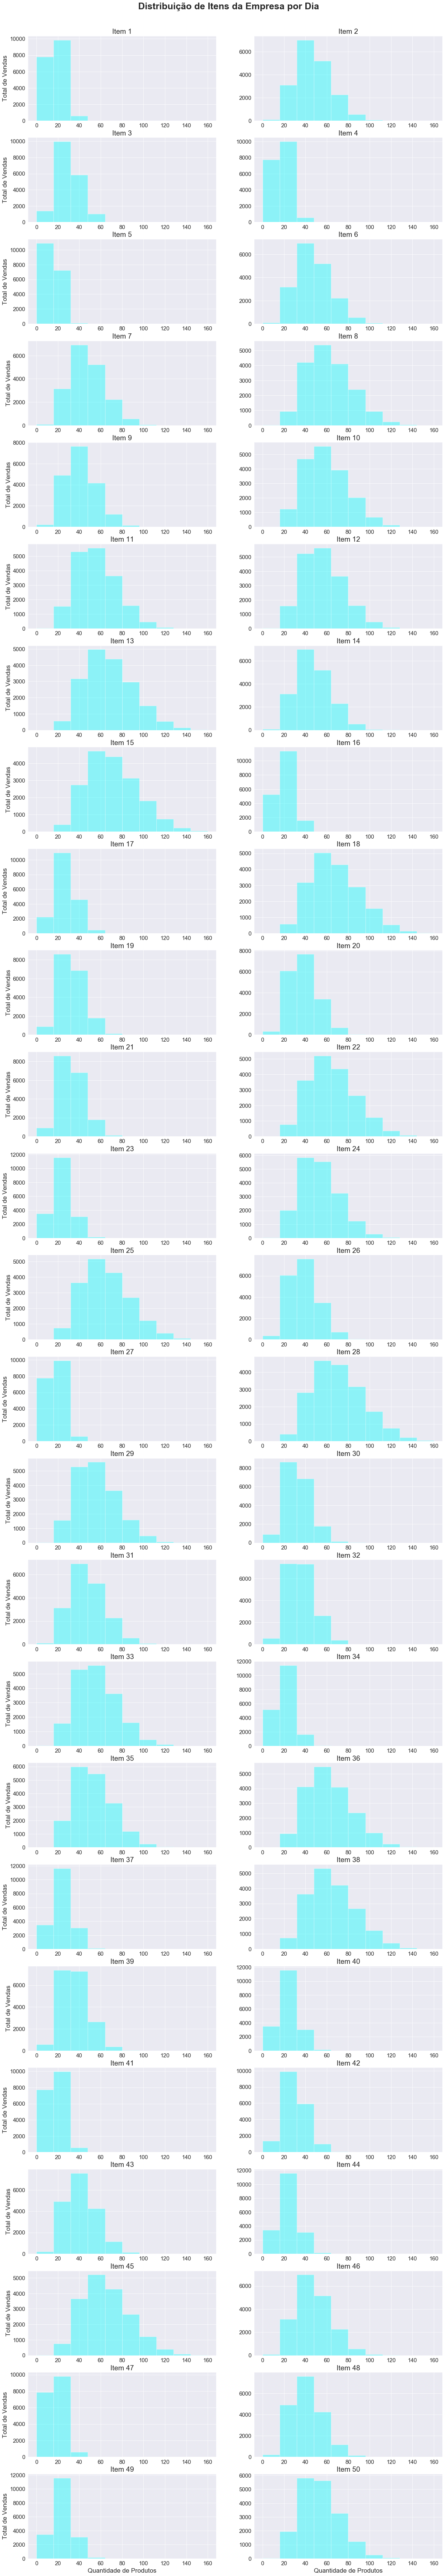

In [53]:
l, c = 25, 2
fig, ax = plt.subplots(ncols=c,nrows=l,figsize=(20,5*l))
fig.suptitle('Distribuição de Itens da Empresa por Dia', fontsize=25, weight='bold',y=0.89)

it = 1

for i in range(0,l):
    
    for j in range(0,c):

        sns.distplot(df[df['item']==it].sales, ax=ax[i,j],color='cyan',bins=range(0,200+20,20),kde=False)
        ax[i,j].set_title('Item {}'.format(it),fontsize=19)
        ax[i,j].set_xlabel('Quantidade de Produtos',fontsize=17)
        ax[i,j].set_ylabel('Total de Vendas',fontsize=17)
        ax[i,j].tick_params(axis='x',labelsize=15)
        ax[i,j].tick_params(axis='y',labelsize=15)
        ax[i,j].set_xticklabels(range(-20,200+20,20))
        
        if j == 1:
            ax[i,j].set_ylabel('',fontsize=17)
            
        if i != 24:
            ax[i,j].set_xlabel('',fontsize=17)
        
        it += 1
       
plt.show()

#### Há correlação na quantidade/distribuição de vendas entre itens e lojas ao longo do tempo ?

In [97]:
df.groupby(['date','item'])[['sales']].sum().reset_index().pivot(index="date",columns="item",values="sales").tail()

item,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
date,,,,,,,,,,,,,,,,,,,,,
2017-12-27,154,500,282,172,148,406,457,579,387,546,...,176,264,381,233,681,487,171,374,231,511
2017-12-28,178,495,298,190,157,506,499,644,420,609,...,172,346,415,248,707,473,188,395,276,587
2017-12-29,207,515,332,192,177,530,532,648,494,617,...,185,304,457,277,724,548,213,496,237,596
2017-12-30,236,538,342,211,173,532,609,784,492,698,...,177,338,507,266,762,566,190,502,303,612
2017-12-31,227,634,402,228,188,565,610,823,544,721,...,246,364,487,299,805,605,211,494,285,626


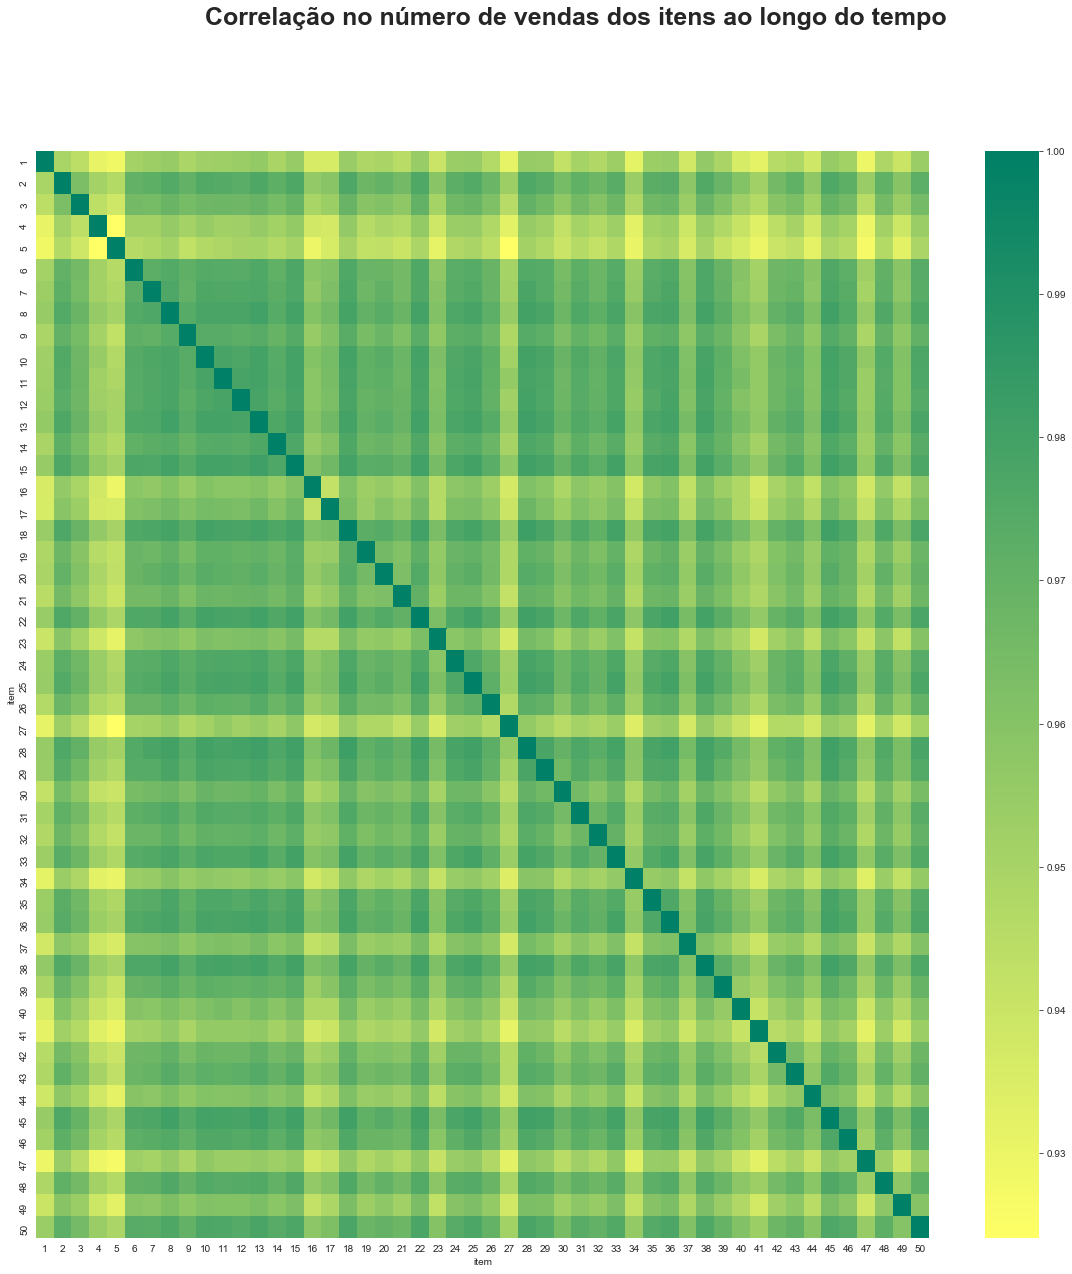

In [99]:
v1 = df.pivot_table(index="date", columns="item", values="sales", aggfunc=np.sum).reset_index(drop=True)

fig , ax = plt.subplots(figsize=(20,20))
fig.suptitle("Correlação no número de vendas dos itens ao longo do tempo",fontsize=25,weight="bold")
sns.set_style("darkgrid")

sns.heatmap(v1.corr(),cmap="summer_r")

plt.show()

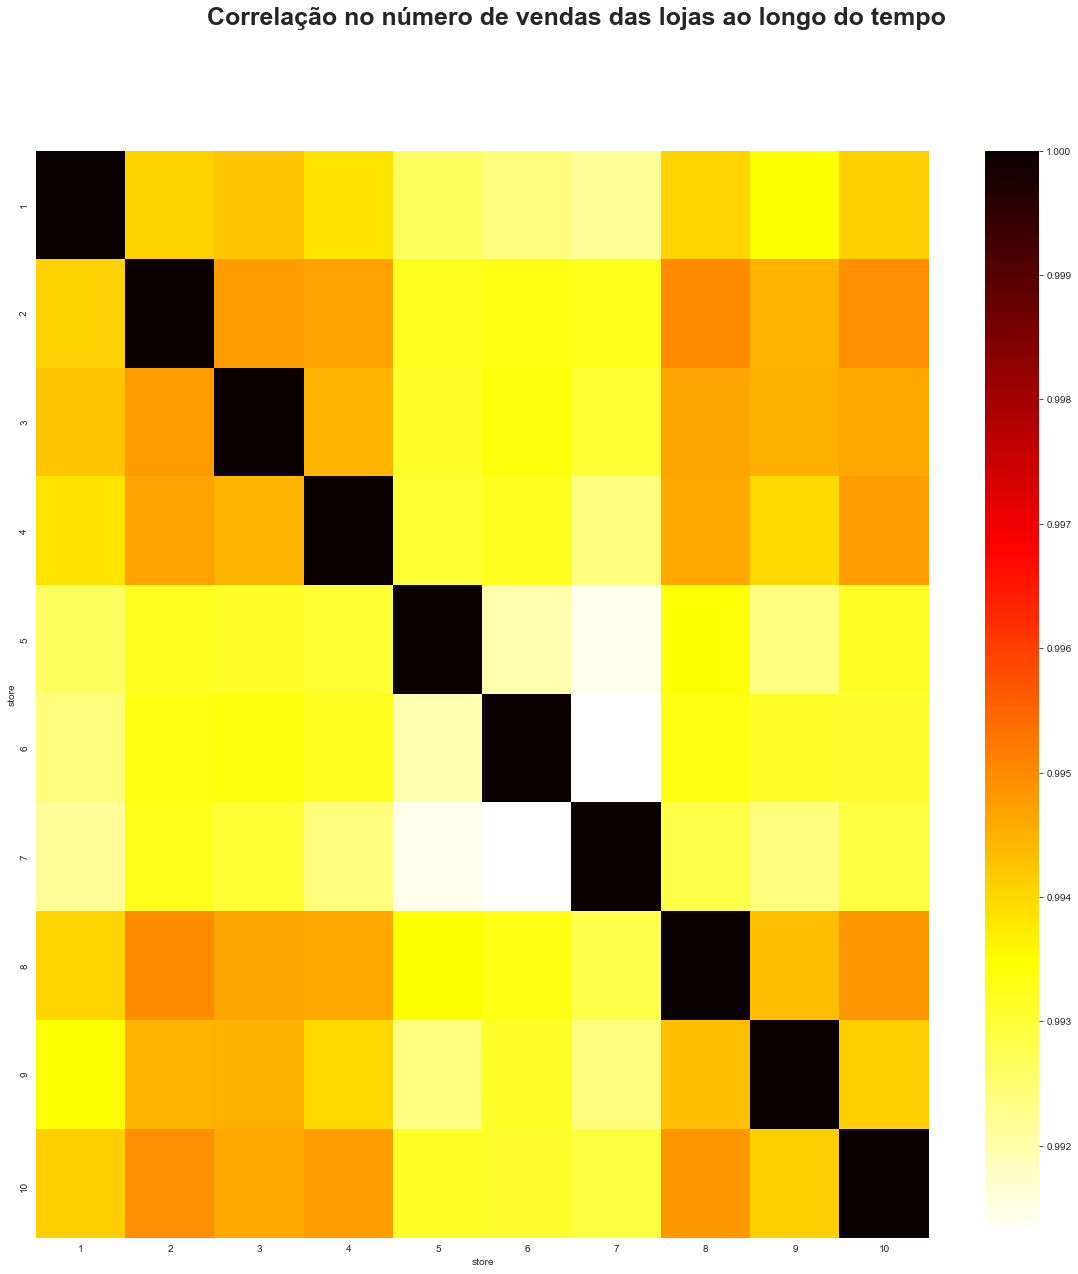

In [100]:
v2 = df.pivot_table(index="date",columns="store",values="sales",aggfunc=sum).reset_index(drop=True)

fig , ax = plt.subplots(figsize=(20,20))
fig.suptitle("Correlação no número de vendas das lojas ao longo do tempo",fontsize=25,weight="bold")
sns.set_style("darkgrid")

sns.heatmap(v2.corr(),cmap="hot_r")

plt.show()

# 

## Feature Engineering I

### Sazonais

In [115]:
#Criando features dia do mês, dia do ano, semana do mês e semana do ano
df['day'] = df.date.dt.day
df['day_year'] = df.date.dt.dayofyear
df['week'] = df.date.dt.week
df['week_year'] = df.date.dt.weekofyear
df.tail(1)

,date,store,item,sales,month,day_week,name_day_week,name_month,day,day_year,week,week_year
912999,2017-12-31,10,50,82,12,6,DOM,DEZ,31,365,52,52


### Lags

In [120]:
#Número de vendas em períodos anteriores por loja e item
#dias t-1, t-2, t-3
df['Sales_Last_1'] = df.groupby(['store','item'])[['sales']].shift(1)
df['Sales_Last_2'] = df.groupby(['store','item'])[['sales']].shift(2)
df['Sales_Last_3'] = df.groupby(['store','item'])[['sales']].shift(3)
#df['Sales_Last_4'] = df.groupby(['store','item'])[['sales']].shift(4)
#df['Sales_Last_5'] = df.groupby(['store','item'])[['sales']].shift(5)
#df['Sales_Last_6'] = df.groupby(['store','item'])[['sales']].shift(6)
#df['Sales_Last_7'] = df.groupby(['store','item'])[['sales']].shift(7)

#Diferença de vendas do período anterior para o "anteanterior" por loja e item
df['Dif_Sales_Last_1'] = df.groupby(['store','item'])[['Sales_Last_1']].diff()
df['Dif_Sales_Last_2'] = df.groupby(['store','item'])[['Sales_Last_2']].diff()
df['Dif_Sales_Last_3'] = df.groupby(['store','item'])[['Sales_Last_3']].diff()

df

,date,store,item,sales,month,day_week,name_day_week,name_month,day,day_year,week,week_year,Sales_Last_1,Sales_Last_2,Sales_Last_3,Dif_Sales_Last_1,Dif_Sales_Last_2,Dif_Sales_Last_3
0,2013-01-01,1,1,13,1,1,TER,JAN,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11,1,2,QUA,JAN,2,2,1,1,13.0,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14,1,3,QUI,JAN,3,3,1,1,11.0,13.0,NaN,-2.0,NaN,NaN
3,2013-01-04,1,1,13,1,4,SEX,JAN,4,4,1,1,14.0,11.0,13.0,3.0,-2.0,NaN
4,2013-01-05,1,1,10,1,5,SAB,JAN,5,5,1,1,13.0,14.0,11.0,-1.0,3.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,12,2,QUA,DEZ,27,361,52,52,41.0,51.0,76.0,-10.0,-25.0,6.0
912996,2017-12-28,10,50,59,12,3,QUI,DEZ,28,362,52,52,63.0,41.0,51.0,22.0,-10.0,-25.0
912997,2017-12-29,10,50,74,12,4,SEX,DEZ,29,363,52,52,59.0,63.0,41.0,-4.0,22.0,-10.0
912998,2017-12-30,10,50,62,12,5,SAB,DEZ,30,364,52,52,74.0,59.0,63.0,15.0,-4.0,22.0


### Medidas de Posição e Dispersão

In [126]:
#Soma de casos confirmados
#Defininda a lista de variáveis a serem coletadas:
features=['Sales_Last_1']
#Definindo os períodos de tempo para serem coletados:
period=[7,14,30] #,365]

for i in list(range(0,len(features))):
    
    for j in list(range(0,len(period))):
        
        #Média
        df['Mean_{}_Days_{}'.format(features[i],period[j])]=df.groupby(['store','item'])[features[i]].rolling(period[j]).mean().values
        #Median
        df['Median_{}_Days_{}'.format(features[i],period[j])]=df.groupby(['store','item'])[features[i]].rolling(period[j]).median().values
        #Máximo
        df['Max_{}_Days_{}'.format(features[i],period[j])]=df.groupby(['store','item'])[features[i]].rolling(period[j]).max().values
        #Mínimo
        df['Min_{}_Days_{}'.format(features[i],period[j])]=df.groupby(['store','item'])[features[i]].rolling(period[j]).min().values        
        #Desvio Padrão
        df['Desvio_{}_Days_{}'.format(features[i],period[j])]=df.groupby(['store','item'])[features[i]].rolling(period[j]).std().values

In [130]:
df.iloc[:,15:].tail(10)

,Dif_Sales_Last_1,Dif_Sales_Last_2,Dif_Sales_Last_3,Mean_Sales_Last_1_Days_7,Median_Sales_Last_1_Days_7,Max_Sales_Last_1_Days_7,Min_Sales_Last_1_Days_7,Desvio_Sales_Last_1_Days_7,Mean_Sales_Last_1_Days_14,Median_Sales_Last_1_Days_14,Max_Sales_Last_1_Days_14,Min_Sales_Last_1_Days_14,Desvio_Sales_Last_1_Days_14,Mean_Sales_Last_1_Days_30,Median_Sales_Last_1_Days_30,Max_Sales_Last_1_Days_30,Min_Sales_Last_1_Days_30,Desvio_Sales_Last_1_Days_30
912990,12.0,-3.0,1.0,61.571429,54.0,86.0,51.0,13.176458,64.000000,67.0,86.0,51.0,10.091886,68.866667,68.0,113.0,49.0,13.346143
912991,12.0,12.0,-3.0,62.000000,54.0,86.0,51.0,13.613719,64.571429,67.0,86.0,51.0,10.493326,68.666667,68.0,113.0,49.0,13.202229
912992,-5.0,12.0,12.0,64.571429,63.0,86.0,51.0,13.100345,64.642857,67.0,86.0,51.0,10.529133,68.100000,68.0,113.0,49.0,12.745114
912993,6.0,-5.0,12.0,63.142857,63.0,76.0,51.0,10.699355,65.142857,67.0,86.0,51.0,10.911230,67.933333,68.0,113.0,49.0,12.602499
912994,-25.0,6.0,-5.0,62.857143,63.0,76.0,51.0,11.036735,64.928571,67.0,86.0,51.0,11.173212,67.033333,67.5,113.0,49.0,12.821005
912995,-10.0,-25.0,6.0,61.000000,63.0,76.0,41.0,13.576941,63.071429,65.0,86.0,41.0,12.839029,64.633333,67.0,86.0,41.0,10.436948
912996,22.0,-10.0,-25.0,62.714286,63.0,76.0,41.0,12.841525,62.785714,63.0,86.0,41.0,12.789290,64.233333,67.0,86.0,41.0,10.254295
912997,-4.0,22.0,-10.0,62.142857,63.0,76.0,41.0,12.915476,61.857143,61.0,86.0,41.0,12.538293,63.933333,66.5,86.0,41.0,10.271935
912998,15.0,-4.0,22.0,62.000000,63.0,76.0,41.0,12.754084,62.000000,61.0,86.0,41.0,12.673413,63.866667,66.5,86.0,41.0,10.197137
912999,-12.0,15.0,-4.0,60.857143,62.0,76.0,41.0,12.266874,62.714286,62.5,86.0,41.0,12.343971,63.500000,66.0,86.0,41.0,10.054164


In [132]:
df.columns

Index(['date', 'store', 'item', 'sales', 'month', 'day_week', 'name_day_week',
       'name_month', 'day', 'day_year', 'week', 'week_year', 'Sales_Last_1',
       'Sales_Last_2', 'Sales_Last_3', 'Dif_Sales_Last_1', 'Dif_Sales_Last_2',
       'Dif_Sales_Last_3', 'Mean_Sales_Last_1_Days_7',
       'Median_Sales_Last_1_Days_7', 'Max_Sales_Last_1_Days_7',
       'Min_Sales_Last_1_Days_7', 'Desvio_Sales_Last_1_Days_7',
       'Mean_Sales_Last_1_Days_14', 'Median_Sales_Last_1_Days_14',
       'Max_Sales_Last_1_Days_14', 'Min_Sales_Last_1_Days_14',
       'Desvio_Sales_Last_1_Days_14', 'Mean_Sales_Last_1_Days_30',
       'Median_Sales_Last_1_Days_30', 'Max_Sales_Last_1_Days_30',
       'Min_Sales_Last_1_Days_30', 'Desvio_Sales_Last_1_Days_30'],
      dtype='object')

### Dummies

In [138]:
#Criando novas colunas para transformação
df['item_cat'] = df.item
df['month_cat'] = df.name_month
df['day_week_cat'] = df.name_day_week

#Transformando as variáveis
ohe = OneHotEncoder(cols=['item_cat','month_cat','day_week_cat'],use_cat_names=True,drop_invariant=True)
df = ohe.fit_transform(df)
df.iloc[:,80:].head()

,item_cat_48.0,item_cat_49.0,item_cat_50.0,month_cat_JAN,month_cat_FEV,month_cat_MAR,month_cat_ABR,month_cat_MAI,month_cat_JUN,month_cat_JUL,...,month_cat_OUT,month_cat_NOV,month_cat_DEZ,day_week_cat_TER,day_week_cat_QUA,day_week_cat_QUI,day_week_cat_SEX,day_week_cat_SAB,day_week_cat_DOM,day_week_cat_SEG
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 

## Clean Data - Missing Values

In [5]:
#Quantidade de valores nulos
df.isna().sum().sum()

135000

In [6]:
#Subsitiuindo os valores nulos por 0
df.fillna(value=0,inplace=True)
df.isna().sum().sum()

0

## Metricas

In [7]:
#Criando métricas utilizando funções

#Root Mean Squared Logarithmic Error
def RMSLE(pred,target):
    
    pred=np.array(pred)
    target=np.array(target)
    
    return np.sqrt(np.mean((np.log1p(abs(pred))-np.log1p(abs(target)))**2))

#Root Squred Logarithmic Error especificado por estado
def RSLE_STATE(pred,target,state):
    p=[]
    t=[]
    s=[]
    
    for i in range(0,len(target)):
        if target[i] != 0:
            p.append(pred[i])
            t.append(target[i])
            s.append(state[i])

    p=np.array(p)
    t=np.array(t)
    s=np.array(s)
    return pd.DataFrame(list([s,t,p,np.sqrt((np.log1p(abs(p))-np.log1p(abs(t)))**2)]),index=['state','target','predict','RSLE']).transpose()

#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
def RMSE(pred,target):
    
    pred=np.array(pred)
    target=np.array(target)
    
    return np.sqrt(mean_squared_error(pred,target))

## Validation

In [45]:
d = len(df.date.unique())
s = d/7
m = d/30
a = d/365
print(d,s,m,a)

1826 260.85714285714283 60.86666666666667 5.002739726027397


## Baseline

In [37]:
error = []
datas = pd.date_range(start='2015-12-01',periods=24,freq='M')
dropcol = ['date','name_day_week','name_month']
data = 0
tr = df[df['date'] < datas[data]].drop(columns=dropcol)
val = df[df['date'] == datas[data]]

In [38]:
val = df[df['date'] >= datas[data]]
val = val[val['date'] < datas[data+1]].drop(columns=dropcol)
val.shape

(15500, 99)

In [39]:
ypred = val.Sales_Last_1.values
ytrue = val.sales.values

In [40]:
RMSLE(ypred,ytrue)

0.302335188514591

In [51]:
len(datas)-1

23

In [61]:
data = 22

if data != len(datas)-1:
    val = df[df['date'] >= datas[data]]
    val = val[val['date'] < datas[data+1]].drop(columns=dropcol)
else:
    val = df[df['date'] >= datas[data]].drop(columns=dropcol)

In [63]:
%%time

error = []

datas = pd.date_range(start='2015-12-01',periods=24,freq='M')

dropcol = ['date','name_day_week','name_month']

print("Período Mensal (últimos 12 meses) | RMSLE\n")
for data in range(0,len(datas)):
    
    #Separação de Dados de Treino e Validação
    tr = df[df['date'] < datas[data]].drop(columns=dropcol)
    
    if data != len(datas)-1:
        val = df[df['date'] >= datas[data]]
        val = val[val['date'] < datas[data+1]].drop(columns=dropcol)
    else:
        val = df[df['date'] >= datas[data]].drop(columns=dropcol)
    
    ypred = val.Sales_Last_1.values
    ytrue = val.sales.values
    
    e = RMSLE(ypred, ytrue)
    error.append(e)
    
    print("{} | {:.4f}".format(data+1,e))
    
print("\nMédia RMSLE : {:.4f}\n".format(np.mean(error)))

Período Mensal (últimos 12 meses) | RMSLE

1 | 0.3023
2 | 0.2872
3 | 0.2888
4 | 0.2698
5 | 0.2676
6 | 0.2578
7 | 0.2485
8 | 0.2749
9 | 0.2627
10 | 0.2676
11 | 0.2770
12 | 0.2943
13 | 0.3066
14 | 0.2976
15 | 0.2798
16 | 0.2645
17 | 0.2645
18 | 0.2505
19 | 0.2459
20 | 0.2654
21 | 0.2595
22 | 0.2721
23 | 0.2645
24 | 0.2894

Média RMSLE : 0.2733

Wall time: 1min 2s


In [8]:
%%time

error = []

datas = pd.date_range(start='2017-12-01',end='2017-12-31',freq='D')

dropcol = ['date','name_day_week','name_month']

print("Período Diário (últimos 31 dias) | RMSLE\n")
for data in range(0,len(datas)):
    
    #Separação de Dados de Treino e Validação
    tr = df[df['date'] < datas[data]].drop(columns=dropcol)
    val = df[df['date'] == datas[data]].drop(columns=dropcol)
    
    ypred = val.Sales_Last_1.values
    ytrue = val.sales.values
    
    e = RMSLE(ypred, ytrue)
    error.append(e)
    
    print("{} | {:.4f}".format(data+1,e))
    
print("\nMédia RMSLE : {:.4f}\n".format(np.mean(error)))

Período Diário (últimos 31 dias) | RMSLE

1 | 0.3347
2 | 0.2359
3 | 0.2445
4 | 0.4880
5 | 0.3019
6 | 0.2562
7 | 0.2695
8 | 0.2503
9 | 0.2245
10 | 0.2159
11 | 0.4751
12 | 0.2975
13 | 0.2410
14 | 0.2455
15 | 0.2490
16 | 0.2183
17 | 0.2237
18 | 0.4434
19 | 0.2761
20 | 0.2406
21 | 0.2507
22 | 0.2482
23 | 0.2501
24 | 0.2356
25 | 0.4730
26 | 0.3027
27 | 0.2398
28 | 0.2478
29 | 0.2453
30 | 0.2401
31 | 0.2437

Média RMSLE : 0.2809

Wall time: 1min 21s


## Algoritmo (Beta)
### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
datas = pd.date_range(start='2017-12-01',end='2017-12-31',freq='D')
dropcol = ['date','name_day_week','name_month']
data=0

tr = df[df['date'] < datas[data]].drop(columns=dropcol)
val = df[df['date'] == datas[data]].drop(columns=dropcol)
    
xtr, ytr = tr.drop(columns='sales'), tr.sales
xval, yval = val.drop(columns='sales'), val.sales

In [66]:
model = LinearRegression(n_jobs=-1).fit(xtr,ytr)

In [67]:
ypred = model.predict(xval)

In [68]:
RMSLE(ypred,yval)

0.32811909844010845

In [135]:
%%time

error = []

datas = pd.date_range(start='2017-12-01',end='2017-12-31',freq='D')

dropcol = ['date','name_day_week','name_month']

print("Período Diário (últimos 31 dias) | RMSLE\n")
for data in range(0,len(datas)):
    
    #Separação de Dados de Treino e Validação
    tr = df[df['date'] < datas[data]].drop(columns=dropcol)
    val = df[df['date'] == datas[data]].drop(columns=dropcol)   
    
    xtr, ytr = tr.drop(columns='sales'), tr.sales
    xval, yval = val.drop(columns='sales'), val.sales
    
    model = LinearRegression(n_jobs=-1).fit(xtr,ytr)
    
    ypred = model.predict(xval)
    ytrue = yval
    
    e = RMSLE(ypred, ytrue)
    error.append(e)
    
    print("{} | {:.4f}".format(data+1,e))
    
print("\nMédia RMSLE : {:.4f}\n".format(np.mean(error)))

Período Diário (últimos 31 dias) | RMSLE

1 | 0.3281
2 | 0.2722
3 | 0.2309
4 | 0.6046
5 | 0.2599
6 | 0.2472
7 | 0.2021
8 | 0.1967
9 | 0.1849
10 | 0.1815
11 | 0.6604
12 | 0.2650
13 | 0.2471
14 | 0.1937
15 | 0.1893
16 | 0.1696
17 | 0.1982
18 | 0.7030
19 | 0.2614
20 | 0.2285
21 | 0.1935
22 | 0.2029
23 | 0.1969
24 | 0.1907
25 | 0.6813
26 | 0.2589
27 | 0.2414
28 | 0.1964
29 | 0.1992
30 | 0.1996
31 | 0.1849

Média RMSLE : 0.2765

Wall time: 24min 26s


In [69]:
%%time

error = []

datas = pd.date_range(start='2015-12-01',periods=24,freq='M')

dropcol = ['date','name_day_week','name_month']

print("Período Mensal (últimos 12 meses) | RMSLE\n")
for data in range(0,len(datas)):
    
    #Separação de Dados de Treino e Validação
    #tr = df[df['date'] < datas[data]].drop(columns=dropcol)
    #val = df[df['date'] == datas[data]].drop(columns=dropcol)

    #Separação de Dados de Treino e Validação
    tr = df[df['date'] < datas[data]].drop(columns=dropcol)
    
    if data != len(datas)-1:
        val = df[df['date'] >= datas[data]]
        val = val[val['date'] < datas[data+1]].drop(columns=dropcol)
    else:
        val = df[df['date'] >= datas[data]].drop(columns=dropcol) 
    
    xtr, ytr = tr.drop(columns='sales'), tr.sales
    xval, yval = val.drop(columns='sales'), val.sales
    
    model = LinearRegression(n_jobs=-1).fit(xtr,ytr)
    
    ypred = model.predict(xval)
    ytrue = yval
    
    e = RMSLE(ypred, ytrue)
    error.append(e)
    
    print("{} | {:.4f}".format(data+1,e))
    
print("\nMédia RMSLE : {:.4f}\n".format(np.mean(error)))

Período Mensal (últimos 12 meses) | RMSLE

1 | 0.3159
2 | 0.2986
3 | 17.1206
4 | 0.1932
5 | 0.1824
6 | 0.1752
7 | 0.1696
8 | 0.1917
9 | 0.1970
10 | 0.2129
11 | 0.2106
12 | 0.3073
13 | 0.3304
14 | 0.2934
15 | 0.2346
16 | 0.1961
17 | 0.1840
18 | 0.1729
19 | 0.1659
20 | 0.1974
21 | 0.2035
22 | 0.2359
23 | 0.1987
24 | 0.3119

Média RMSLE : 0.9292

Wall time: 14min 18s
Compiler : 248 ms


# 

# 

## Save and Load Data

In [5]:
#df.to_csv("demanda_forecast.csv",sep=";",index=False)

In [2]:
df = pd.read_csv("demanda_forecast.csv",sep=';')
df.date = pd.to_datetime(df.date)
df.tail(1)

,date,store,item,sales,month,day_week,name_day_week,name_month,day,day_year,...,month_cat_OUT,month_cat_NOV,month_cat_DEZ,day_week_cat_TER,day_week_cat_QUA,day_week_cat_QUI,day_week_cat_SEX,day_week_cat_SAB,day_week_cat_DOM,day_week_cat_SEG
912999,2017-12-31,10,50,82,12,6,DOM,DEZ,31,365,...,0,0,1,0,0,0,0,0,1,0


In [3]:
df.shape

(913000, 102)

# 

### EXTRA!
#### Que tipo de loja vende mais produtos entre maio e agosto ao decorrer dos anos, sendo que a loja vende menos na segunda e ao decorrer dos dias esse número aumente atingindo o maior volume de vendas no domingo. Um detalhe importantíssimo é que os meses que menos vendem são Janeiro, Fevereiro e Dezembro, o que tira qualquer teoria a respeito de férias nesse período, mas poderia ser o clima uma vez que a loja é dos EUA ? 
#### Eu penso que entre MAI e AGO é um período próximo as férias e sendo que há um maior movimento no fim de semana, eu chutaria que é um lugar de entretenimento slá, mas qual tipo de lazer seria ?